# Test for SW model with IT generation 

This notebook aims at testing Internal Tide Generation in a basic study case (ridge in the middle). 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('Agg')

In [2]:
path_config = 'config_hawaii_generation'

In [3]:
import sys
#dir_massh = '/home/bellemva/MASSH/mapping'
dir_massh = '/Users/vbellemin/python/MASSH/mapping'
sys.path.append(dir_massh)

In [4]:
from src import exp
config = exp.Exp(path_config)

name_experiment: config_hawaii_generation
saveoutputs: True
name_exp_save: config_hawaii_generation
path_save: ../outputs/config_hawaii_generation
tmp_DA_path: ../scratch/config_hawaii_generation
init_date: 2012-06-05 00:00:00
final_date: 2012-06-10 00:00:00
assimilation_time_step: 1:00:00
saveoutput_time_step: 1:00:00
flag_plot: 4
write_obs: True
path_obs: ../obs/2022a_4DVARQG
coriolis_force: False
name_lon: lon
name_lat: lat
name_time: time
plot_time_step: 1 day, 0:00:00
time_obs_min: None
time_obs_max: None
compute_obs: False

NAME_BC is not set in the configuration file


In [5]:
from src import state as state
State = state.State(config)

super: GRID_GEO
lon_min: 185.0
lon_max: 205
lat_min: 15.0
lat_max: 35.0
dlon: 0.08333333333333333
dlat: 0.08333333333333333
name_init_mask: ./mask/mask_square.nc
name_var_mask: {'lon': 'longitude', 'lat': 'latitude', 'var': 'mask'}
interp_method_mask: nearest



In [6]:
from src import mod as mod
Model = mod.Model(config,State)

super: MOD_SW1L_JAX
name_var: {'U': 'u', 'V': 'v', 'SSH': 'ssh'}
name_init_var: []
name_params: ['itg']
dir_model: None
var_to_save: None
dtmodel: 300
time_scheme: rk4
bc_kind: 1d
bc_island: dirichlet
w_waves: [0.00014376682471122976]
He_init: 0.7
He_data: None
Ntheta: 1
g: 9.81



In [7]:
State.mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

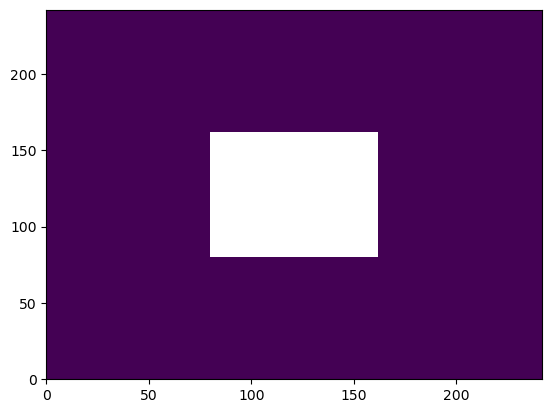

In [8]:
plt.pcolormesh(State.var['v'])

Setting a ridge of IT generation. 

In [9]:
State = state.State(config)
Model = mod.Model(config,State)

super: GRID_GEO
lon_min: 185.0
lon_max: 205
lat_min: 15.0
lat_max: 35.0
dlon: 0.08333333333333333
dlat: 0.08333333333333333
name_init_mask: ./mask/mask_square.nc
name_var_mask: {'lon': 'longitude', 'lat': 'latitude', 'var': 'mask'}
interp_method_mask: nearest

super: MOD_SW1L_JAX
name_var: {'U': 'u', 'V': 'v', 'SSH': 'ssh'}
name_init_var: []
name_params: ['itg']
dir_model: None
var_to_save: None
dtmodel: 300
time_scheme: rk4
bc_kind: 1d
bc_island: dirichlet
w_waves: [0.00014376682471122976]
He_init: 0.7
He_data: None
Ntheta: 1
g: 9.81



Text(0.5, 1.0, 'Visualisation of IT generation site')

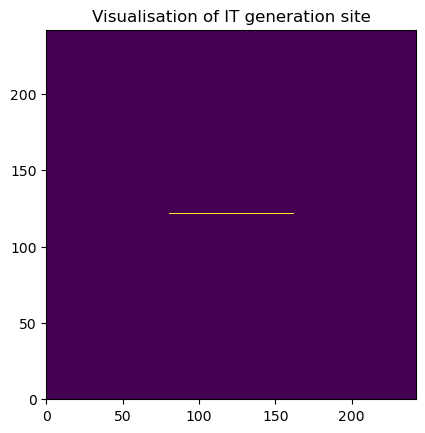

In [13]:
array_itg = np.zeros_like(State.params['itg'][0])
array_itg[121,80:242-80]=1e-3
#array_itg[1,:]=1e-3
fig,ax = plt.subplots(1,1)
ax.pcolormesh(array_itg)
ax.set_aspect("equal")
ax.set_title("Visualisation of IT generation site")

In [ ]:
State.params['itg'][1]=array_itg

In [ ]:
####################
### SAVING PLOTS ###
####################
def form(i) : 
    if i//10 ==0 : 
        return "00" + str(i)
    elif i//100 ==0 : 
        return "0" + str(i) 
    else : 
        return str(i)

def save_plot (State,i):
    fig,ax = plt.subplots(1,1)
    ax.pcolormesh(State.var['ssh'],cmap='RdBu',vmin=-1.5,vmax=1.5)
    #ax.colorbar()
    ax.set_aspect("equal")
    plt.savefig("./frames/"+form(i)+".png")

t=0
for i in range (200):
    #print (i," : ", State.params['itg'][1,30,121]) #, end="\r"
    #if i==7 : 
    #    State.params['itg'][1,30,80:242-80]=0
    Model.step(State,t=t,nstep=10)
    t+=10*Model.dt
    save_plot(State,i)


In [ ]:
6.07*3600/300

In [ ]:
t=0

Model.step(State,nstep=1000,t=t)

In [ ]:
fig,ax = plt.subplots(1,1)
ax.pcolormesh(State.var['ssh'],cmap='RdBu',vmin=-1.5,vmax=1.5)
#ax.colorbar()
ax.set_aspect("equal")

In [ ]:
t=0

Model.step(State,nstep=10,t=t)

fig,ax = plt.subplots(1,1)
ax.pcolormesh(State.var['ssh'],cmap='RdBu',vmin=-1.5,vmax=1.5)
#ax.colorbar()
ax.set_aspect("equal")

t+=10*Model.dt

In [ ]:
import numpy as np
a = np.array([[False,True],[True,True]])
b = np.array([[1,2],[3,4]])
b[np.where(a)]

In [ ]:
mask = np.where(a)
np.zeros(mask[0].shape)

In [ ]:
for k,(i,j) in enumerate(zip(mask[0],mask[1])) : 
    print(k,i,j)

In [ ]:
np.argwhere(a).shape[0]

In [ ]:
np.any(np.argwhere(a))

In [ ]:
for idx in np.argwhere(a): 
    print(idx)

In [ ]:
np.array([[False,False],[False,False]])

In [ ]:
import numpy as np 
a= np.array([1,2,3],dtype='float')
b = np.array([],dtype='float')
np.concatenate((a,b))